In [1]:
import os, sys

import glob
import zipfile

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
%matplotlib inline

In [2]:
plt.style.use('seaborn') # seaborn 스타일로 변환
sns.set(rc={'figure.figsize' : (15,7)})
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)
warnings.filterwarnings('ignore')

# 0. 대회 설명

 - 대회 : https://www.kaggle.com/c/titanic
 - 주제 : predicts which passengers survived the trainanic shipwreck
 - 문제 정의 : 어떤 특징의 승객이 살아남을 확률이 높을 것인가
 - Data Description
     - survival	 Survival	0 = No, 1 = Yes
     - pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
     - sex	Sex	
     - Age	Age in years
     - sibsp	# of siblings / spouses aboard the Titanic	
     - parch	# of parents / children aboard the Titanic	
     - ticket	Ticket number	
     - fare	Passenger fare	
     - cabin	Cabin number	
     - embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

# 1. Data Load

In [3]:
!kaggle competitions download -c titanic

  0%|                                               | 0.00/34.1k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 34.1k/34.1k [00:00<00:00, 6.49MB/s]


In [9]:
os.listdir()

['.DS_Store', 'titanic.zip', '.ipynb_checkpoints', 'data', 'Titanic.ipynb']

In [5]:
unzip = zipfile.ZipFile('titanic.zip')
unzip.extractall(path = 'data')

In [10]:
os.listdir('./data/')

['test.csv', 'train.csv', 'gender_submission.csv']

In [12]:
train = pd.read_csv(os.path.join('data', 'train.csv'))
test = pd.read_csv(os.path.join('data', 'test.csv'))

In [13]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [17]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 2. EDA

## 2-1. Label (Survived)

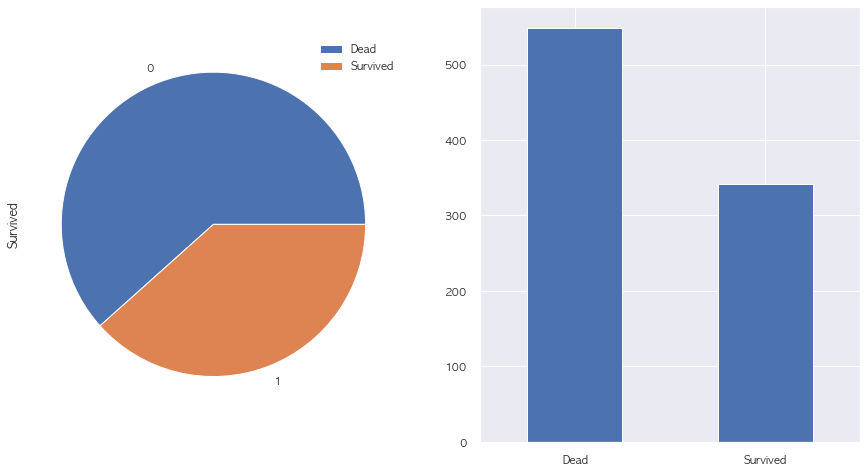

In [36]:
# 생존 / 사망 비율
#  0, Dead / 1, Survived
f, ax = plt.subplots(1, 2, figsize=(15,8))
train['Survived'].value_counts().plot.pie(rot = 0, ax = ax[0])
ax[0].legend(['Dead', 'Survived'])
train['Survived'].value_counts().plot.bar(rot = 0, ax = ax[1])
ax[1].set_xticklabels(labels = ['Dead', 'Survived'])
plt.show()

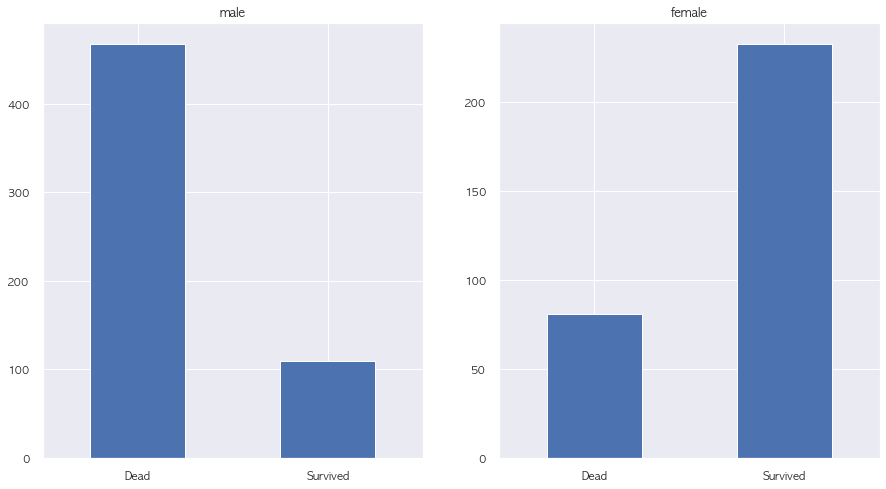

In [19]:
# 성별별 사망 비율
f, ax = plt.subplots(1, 2, figsize=(15,8))
train.loc[train['Sex'] == 'male', 'Survived'].value_counts().sort_index().plot.bar(rot = 0, ax = ax[0])
ax[0].set_title('male')
ax[0].set_xticklabels(['Dead', 'Survived'])
train.loc[train['Sex'] == 'female', 'Survived'].value_counts().sort_index().plot.bar(rot = 0, ax = ax[1])
ax[1].set_title('female')
ax[1].set_xticklabels(['Dead', 'Survived'])
plt.show()

In [22]:
# P_class 별 생존여부
pd.pivot_table(train, index = 'Pclass', columns = 'Survived', values = 'Name', aggfunc='count', fill_value=0)
# pd.crosstab(train['Pclass'], train['Survived']) # 똑같은 결과

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


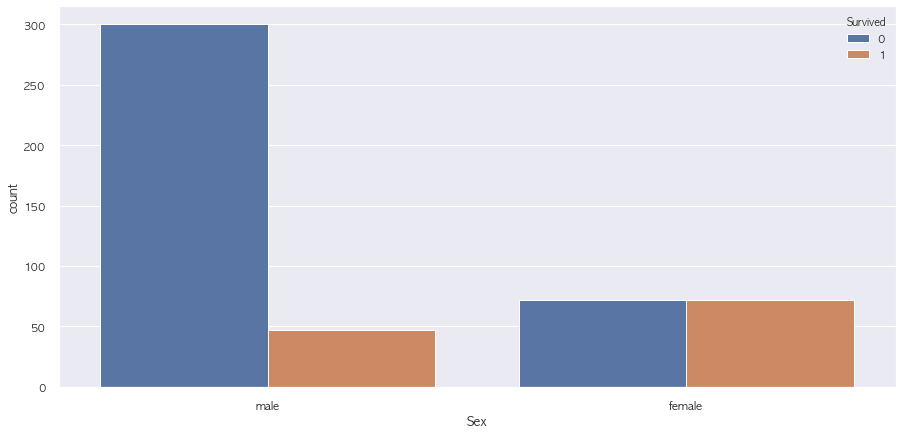

In [34]:
# Pclass가 3인 경우, 죽은 인원과 비율이 굉장히 많고 높음
# 보통 Pclasss는 남성인 경우가 많지만 생존된 비율은 여성이 더 높음
sns.countplot(data = train.loc[train['Pclass'] == 3], x = 'Sex', hue = 'Survived')
plt.show()

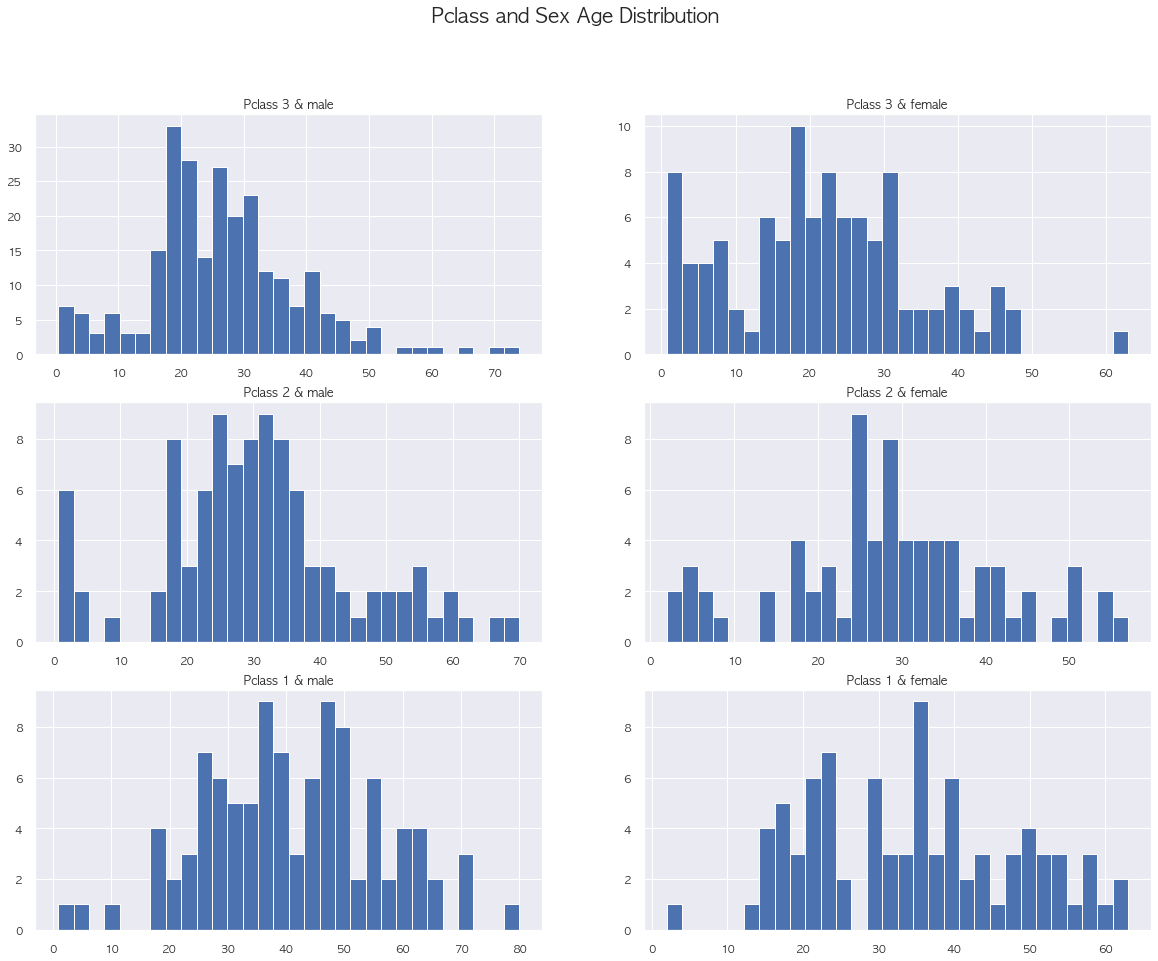

In [52]:
# Pclass별 차이 확인
# Pclass & sex 별 나이 분포도
# Pclass 1->3 으로 갈수록 나이 분포가 점차 낮아지는 것을 확인 가능

f, ax = plt.subplots(3,2, figsize = (20, 15))
train.loc[(train['Pclass'] == 3) & (train['Sex'] == 'male'), 'Age'].hist(bins = 30, ax = ax[0][0])
train.loc[(train['Pclass'] == 3) & (train['Sex'] == 'female'), 'Age'].hist(bins = 30, ax = ax[0][1])
ax[0][0].set_title('Pclass 3 & male')
ax[0][1].set_title('Pclass 3 & female')

train.loc[(train['Pclass'] == 2) & (train['Sex'] == 'male'), 'Age'].hist(bins = 30, ax = ax[1][0])
train.loc[(train['Pclass'] == 2) & (train['Sex'] == 'female'), 'Age'].hist(bins = 30, ax = ax[1][1])
ax[1][0].set_title('Pclass 2 & male')
ax[1][1].set_title('Pclass 2 & female')

train.loc[(train['Pclass'] == 1) & (train['Sex'] == 'male'), 'Age'].hist(bins = 30, ax = ax[2][0])
train.loc[(train['Pclass'] == 1) & (train['Sex'] == 'female'), 'Age'].hist(bins = 30, ax = ax[2][1])
ax[2][0].set_title('Pclass 1 & male')
ax[2][1].set_title('Pclass 1 & female')

plt.suptitle('Pclass and Sex Age Distribution', fontsize = 20)

plt.show()

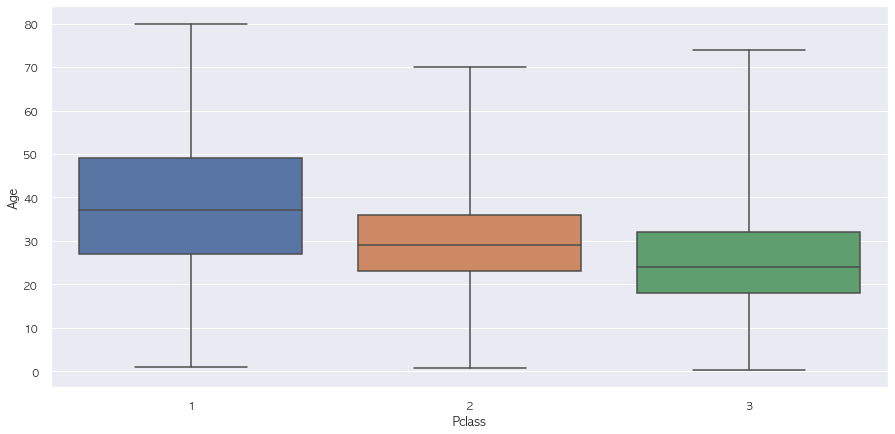

In [60]:
# boxplot 확인 결과 확실히 Pclass 낮을수록 연령대가 높음
sns.boxplot(x="Pclass", y="Age", data=train, whis=np.inf)
plt.show()

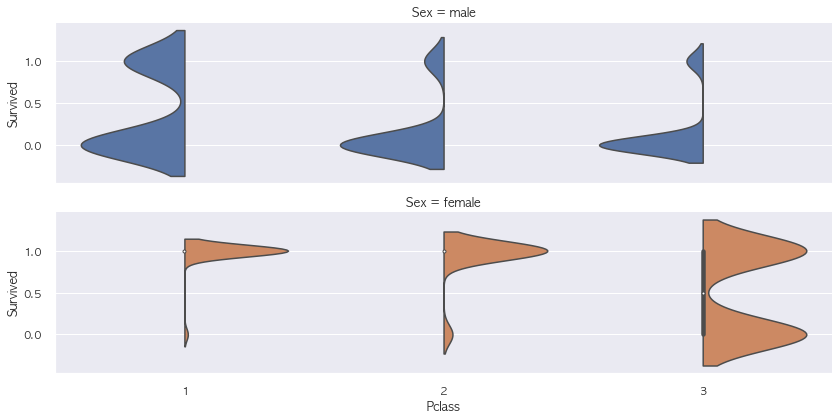

In [59]:
# Pclass $ sex 별 survived 분포
# Pclass 3->1 으로 갈수록 남성이 생존하는 비율이 높아지고
# Pclass 1 인 경우에는 여성이 사망하는 경우가 거의 없음
# 결론적으로, Pclass는 좀 더 고위층인 느낌인 들며 Survived(0/1)에 생각보다 영향을 많이 미치는 것 같음
sns.catplot(x = "Pclass", y = "Survived", hue = "Sex", row = "Sex", data = train,
            kind = "violin", split = True, height = 3, aspect = 4)
plt.show()

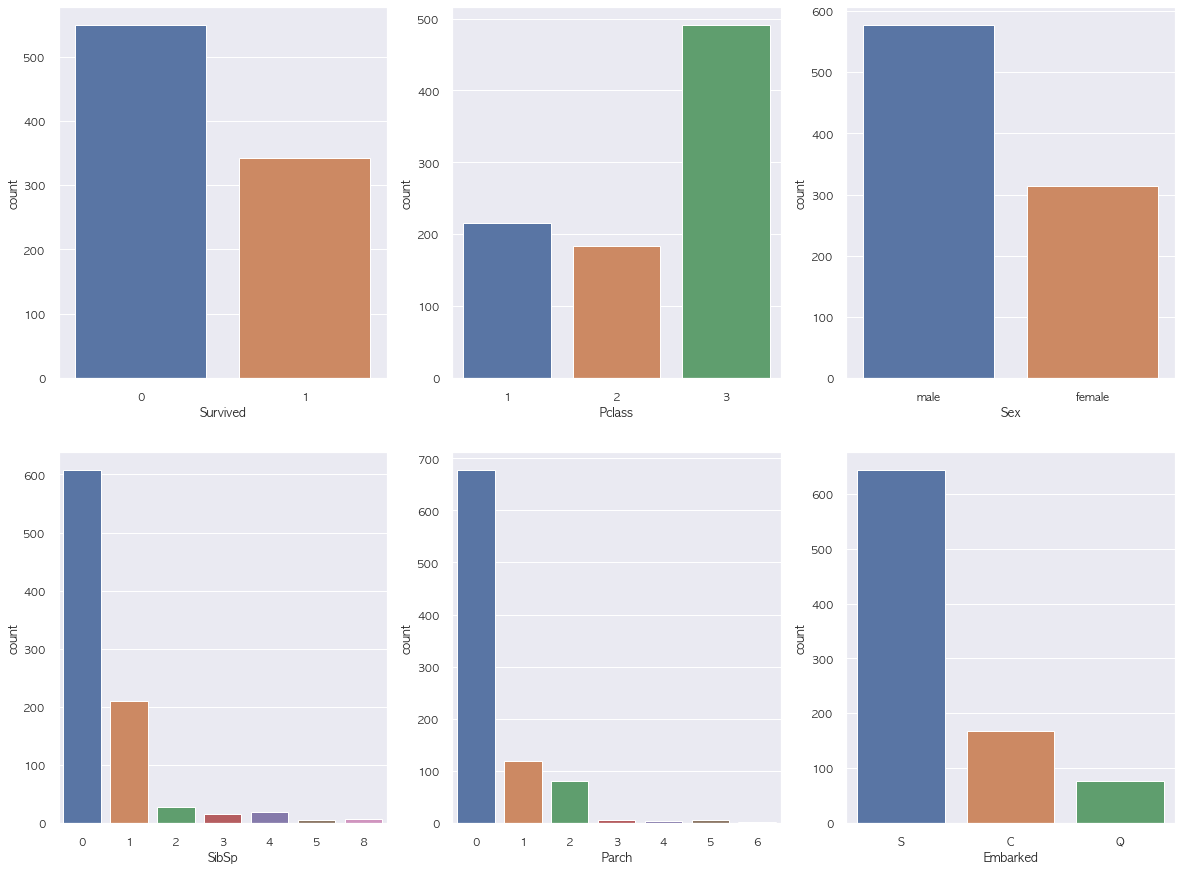

In [61]:
# 단순 feature에 대한 countplot
f, ax = plt.subplots(2,3, figsize = (20, 15))
columns = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
q = 0

for i in range(2):
    for j in range(3):
        fig = sns.countplot(x = train[columns[q]], ax = ax[i][j])
        q += 1

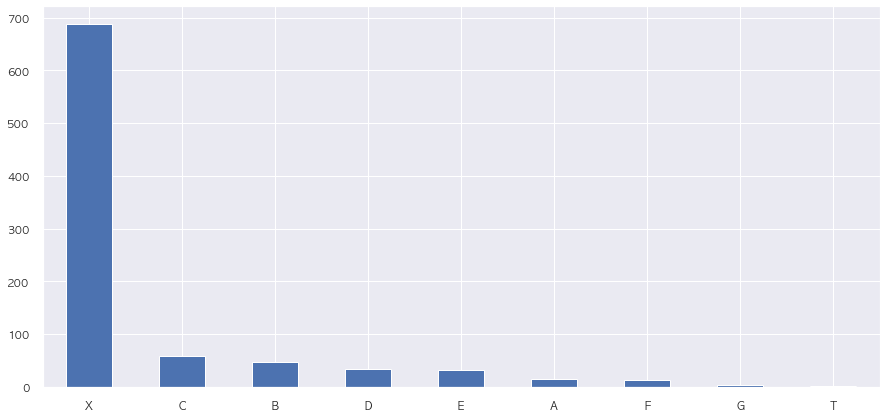

In [62]:
# Cabin 은 정확히 어떤 의미인지는 모르지만, NaN 인 경우가 많음
# Cabin: a small room where you sleep in a ship
# 선실의 종류를 의미하는 것 같기 때문에 Pclass와 같이 보면 좋을 것 같음
train['Cabin'].fillna('X').apply(lambda x : x[:1]).value_counts().plot.bar(rot = 0)
plt.show()

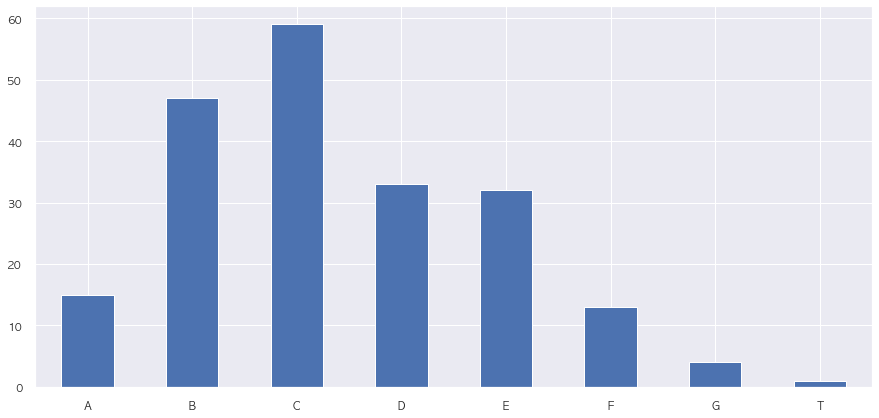

In [23]:
# NaN 제외 Cabin 분포
data = []
train.loc[train['Cabin'].notnull(), 'Cabin'].apply(lambda x : data.extend(x[:1]))
pd.Series(data).value_counts().sort_index().plot.bar(rot = 0)
plt.show()

In [96]:
Pclass_cabin = train.loc[train['Cabin'].notnull(), ['Survived', 'Pclass', 'Cabin', 'Fare']]
Pclass_cabin['Cabin'] = Pclass_cabin['Cabin'].apply(lambda x : x[:1])
Pclass_cabin.head()

,Survived,Pclass,Cabin,Fare
1,1,1,C,71.2833
3,1,1,C,53.1000
6,0,1,E,51.8625
10,1,3,G,16.7000
11,1,1,C,26.5500


In [97]:
# 흠.. 모집단이 너무 작아 확실한 결론을 내리기가 애매하지만..
# 일단 Pclass 1은 F, G, T 에는 거의 없음
pd.pivot_table(Pclass_cabin, index = 'Pclass', columns = 'Cabin', values = 'Survived', aggfunc = 'count')

Cabin,A,B,C,D,E,F,G,T
Pclass,,,,,,,,
1,15.0,47.0,59.0,29.0,25.0,NaN,NaN,1.0
2,NaN,NaN,NaN,4.0,4.0,8.0,NaN,NaN
3,NaN,NaN,NaN,NaN,3.0,5.0,4.0,NaN


In [98]:
# 확실히 Pclass가 높을수록 생존 가능성이 높다는 가설이 맞는것...같은...
# 그렇다면 비어있는 cabin에 대한 처리를 어떤식으로 할 수 있을까!
# 만약 Cabin 이 선실에 대한 의미이면 Fare(요금?)이랑 연관이 있지 않을까?!
pd.pivot_table(Pclass_cabin, index = 'Survived', columns = 'Cabin', values = 'Pclass', aggfunc = 'count')

Cabin,A,B,C,D,E,F,G,T
Survived,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN


In [99]:
# 오오.. 확실히 Pclass 1의 Cabin의 fare가 높음
pd.pivot_table(Pclass_cabin, index = 'Pclass', columns = 'Cabin', values = 'Fare', aggfunc = np.mean)

Cabin,A,B,C,D,E,F,G,T
Pclass,,,,,,,,
1,39.623887,113.505764,100.151341,63.324286,55.740168,NaN,NaN,35.5
2,NaN,NaN,NaN,13.166675,11.587500,23.75000,NaN,NaN
3,NaN,NaN,NaN,NaN,11.000000,10.61166,13.58125,NaN


In [104]:
pd.pivot_table(Pclass_cabin, index = 'Survived', columns = 'Cabin', values = 'Fare', aggfunc = np.median)

Cabin,A,B,C,D,E,F,G,T
Survived,,,,,,,,
0,37.3896,42.7500,81.1625,43.5604,45.18125,7.65000,10.4625,35.5
1,35.5000,91.0792,89.1042,63.3583,39.82500,24.17915,16.7000,NaN


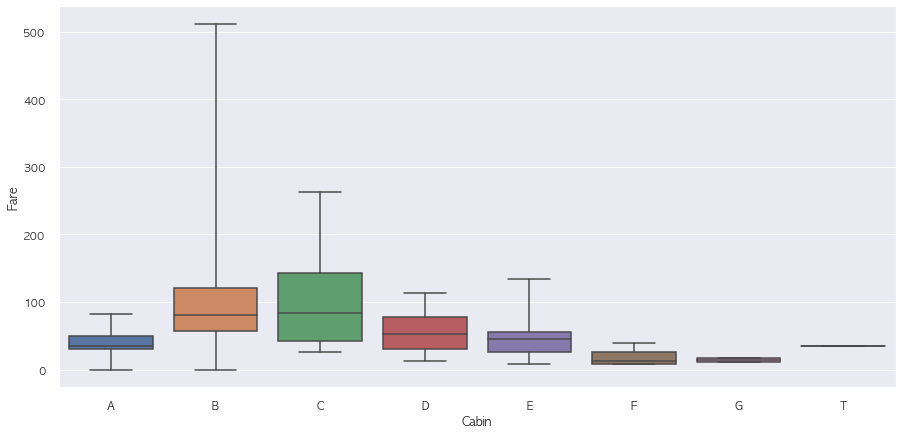

In [102]:
# Fare가 10 이하일 경우에는 F, G 랜덤 부여
# Fare가 10 초과 50 이하일 경우에는 A, D, E, T
# Fare가 50 초과일 경우에는 B, C
sns.boxplot(x = "Cabin", y = "Fare", data = Pclass_cabin.sort_values('Cabin'), whis=np.inf)
plt.show()

In [75]:
# 이름에서 생존여부 차이를 알 수 있을까

In [137]:
train.loc[(train['Name'].str.contains('Mr')) & (train['Name'].str.contains('Mrs') == False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


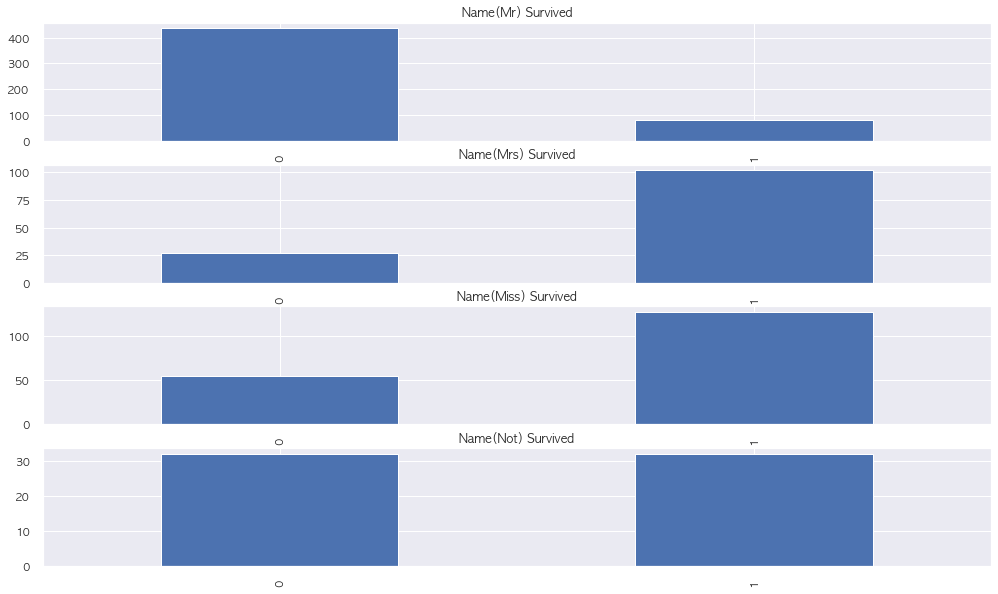

In [141]:
f, ax = plt.subplots(4,1, figsize = (17, 10))

train.loc[(train['Name'].str.contains('Mr')) & (train['Name'].str.contains('Mrs') == False), 'Survived'].value_counts().sort_index().plot.bar(ax = ax[0])
ax[0].set_title('Name(Mr) Survived')

train.loc[train['Name'].str.contains('Mrs'), 'Survived'].value_counts().sort_index().plot.bar(ax = ax[1])
ax[1].set_title('Name(Mrs) Survived')

train.loc[train['Name'].str.contains('Miss'), 'Survived'].value_counts().sort_index().plot.bar(ax = ax[2])
ax[2].set_title('Name(Miss) Survived')

train.loc[~train['Name'].str.contains('Mr|Miss|Mrs'), 'Survived'].value_counts().sort_index().plot.bar(ax = ax[3])
ax[3].set_title('Name(Not) Survived')

plt.show()

In [164]:
train['Agegroup'] = train['Age'].apply(lambda x : 'baby' if (x > 0) & (x < 5) else (
            'Child' if (x > 5) & (x <= 12) else(
            'Teenager' if (x > 12) & (x <= 18) else(
            'Student' if (x > 18) & (x <= 24) else(
            'Young Adult' if (x > 24) & (x <= 35) else(
            'Adult' if (x > 35) & (x <= 60) else(
            'Senior' if x > 60 else 'Unknown'
            )))))))

In [167]:
pd.pivot_table(train, index = 'Pclass', columns = 'Agegroup', values = 'Fare', aggfunc = np.mean)

Agegroup,Adult,Child,Senior,Student,Teenager,Unknown,Young Adult,baby
Pclass,,,,,,,,
1,76.983334,120.00000,59.96905,114.781878,122.537500,60.551940,92.497581,128.319433
2,19.760638,30.56250,10.50000,25.048852,21.172567,9.584375,19.773205,28.215283
3,13.334195,27.32625,7.82000,9.085753,13.414589,14.973859,11.634408,22.912832


# 3. Preprocessing

In [153]:
from sklearn.base import BaseEstimator, TransformerMixin

In [281]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [282]:
class preprocessing(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        # 나이 null값 채우기
        temp = pd.pivot_table(X, index = 'Pclass', columns = 'Sex', values = 'Age', aggfunc = np.median)
        
        for pclass, sex in X.loc[X['Age'].isnull(), ['Pclass', 'Sex']].drop_duplicates().values:
            X.loc[(X['Age'].isnull()) & (X['Pclass'] == pclass) & (X['Sex'] == sex), 'Age'] = temp.loc[pclass, sex]
        
        # 나이 그룹 피처 생성
        X['Agegroup'] = X['Age'].apply(lambda x : 'baby' if (x > 0) & (x < 5) else (
            'Child' if (x > 5) & (x <= 12) else(
            'Teenager' if (x > 12) & (x <= 18) else(
            'Student' if (x > 18) & (x <= 24) else(
            'Young Adult' if (x > 24) & (x <= 35) else(
            'Adult' if (x > 35) & (x <= 60) else(
            'Senior' if x > 60 else 'Unknown'
            )))))))
        
        # cabin 피쳐 전처리
        X['Cabin'] = X['Cabin'].fillna('X').apply(lambda x : x[:1])
        X.loc[X['Cabin'] == 'X', 'Cabin'] = (X.apply(lambda x: np.random.choice(['F', 'G']) if x['Fare'] <= 10 else (
                                                               np.random.choice(['A', 'D', 'E', 'T']) if x['Fare'] > 10 and x['Fare'] < 50 else
                                                               np.random.choice(['B', 'C'])
                                                     ), axis = 1))
        
        
        # 티켓 글자 포함 여부
        X['Ticket'] = X['Ticket'].apply(lambda x : 1 if x.isalnum() else 0)
        
        # Fare qcut
        X['Fare_qcut'] = pd.qcut(X['Fare'], 5, labels = False)
        
        # 이름별 특징 정리
        X['Name'] = X['Name'].apply(lambda x : 0 if 'Mrs' in x or 'Miss' in x else (1 if 'Mr' in x else 3)).astype(str)
        
        return X

In [284]:
preprocessing = preprocessing()

In [285]:
X = preprocessing.fit_transform(train)

In [286]:
X

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agegroup,Fare_qcut
0,1,0,3,1,male,22.0,1,0,0,7.2500,F,S,Student,0
1,2,1,1,0,female,38.0,1,0,0,71.2833,C,C,Adult,4
2,3,1,3,0,female,26.0,0,0,0,7.9250,F,S,Young Adult,1
3,4,1,1,0,female,35.0,1,0,1,53.1000,C,S,Young Adult,4
4,5,0,3,1,male,35.0,0,0,1,8.0500,F,S,Young Adult,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,3,male,27.0,0,0,1,13.0000,E,S,Young Adult,2
887,888,1,1,0,female,19.0,0,0,1,30.0000,B,S,Student,3
888,889,0,3,0,female,21.5,1,2,0,23.4500,D,S,Student,3
889,890,1,1,1,male,26.0,0,0,1,30.0000,C,C,Young Adult,3


In [287]:
y = X['Survived']
continuous = ['Age', 'Fare', 'Fare_qcut']
categorical = list(set(X.columns) - set(continuous) - set(['Survived']))
drop = ['passengerId']

In [288]:
X = pd.concat([pd.get_dummies(X[categorical]), X[continuous]], axis = 1)
X

,Parch,Pclass,Ticket,SibSp,PassengerId,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Age,Fare,Fare_qcut
0,0,3,0,1,1,0,1,0,0,1,...,0,0,0,0,1,0,0,22.0,7.2500,0
1,0,1,0,1,2,1,0,1,0,0,...,0,1,0,0,0,0,0,38.0,71.2833,4
2,0,3,0,0,3,1,0,0,0,1,...,0,0,0,0,1,0,0,26.0,7.9250,1
3,0,1,1,1,4,1,0,0,0,1,...,0,1,0,0,0,0,0,35.0,53.1000,4
4,0,3,1,0,5,0,1,0,0,1,...,0,0,0,0,1,0,0,35.0,8.0500,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,0,887,0,1,0,0,1,...,0,0,0,1,0,0,0,27.0,13.0000,2
887,0,1,1,0,888,1,0,0,0,1,...,1,0,0,0,0,0,0,19.0,30.0000,3
888,2,3,0,1,889,1,0,0,0,1,...,0,0,1,0,0,0,0,21.5,23.4500,3
889,0,1,1,0,890,0,1,1,0,0,...,0,1,0,0,0,0,0,26.0,30.0000,3


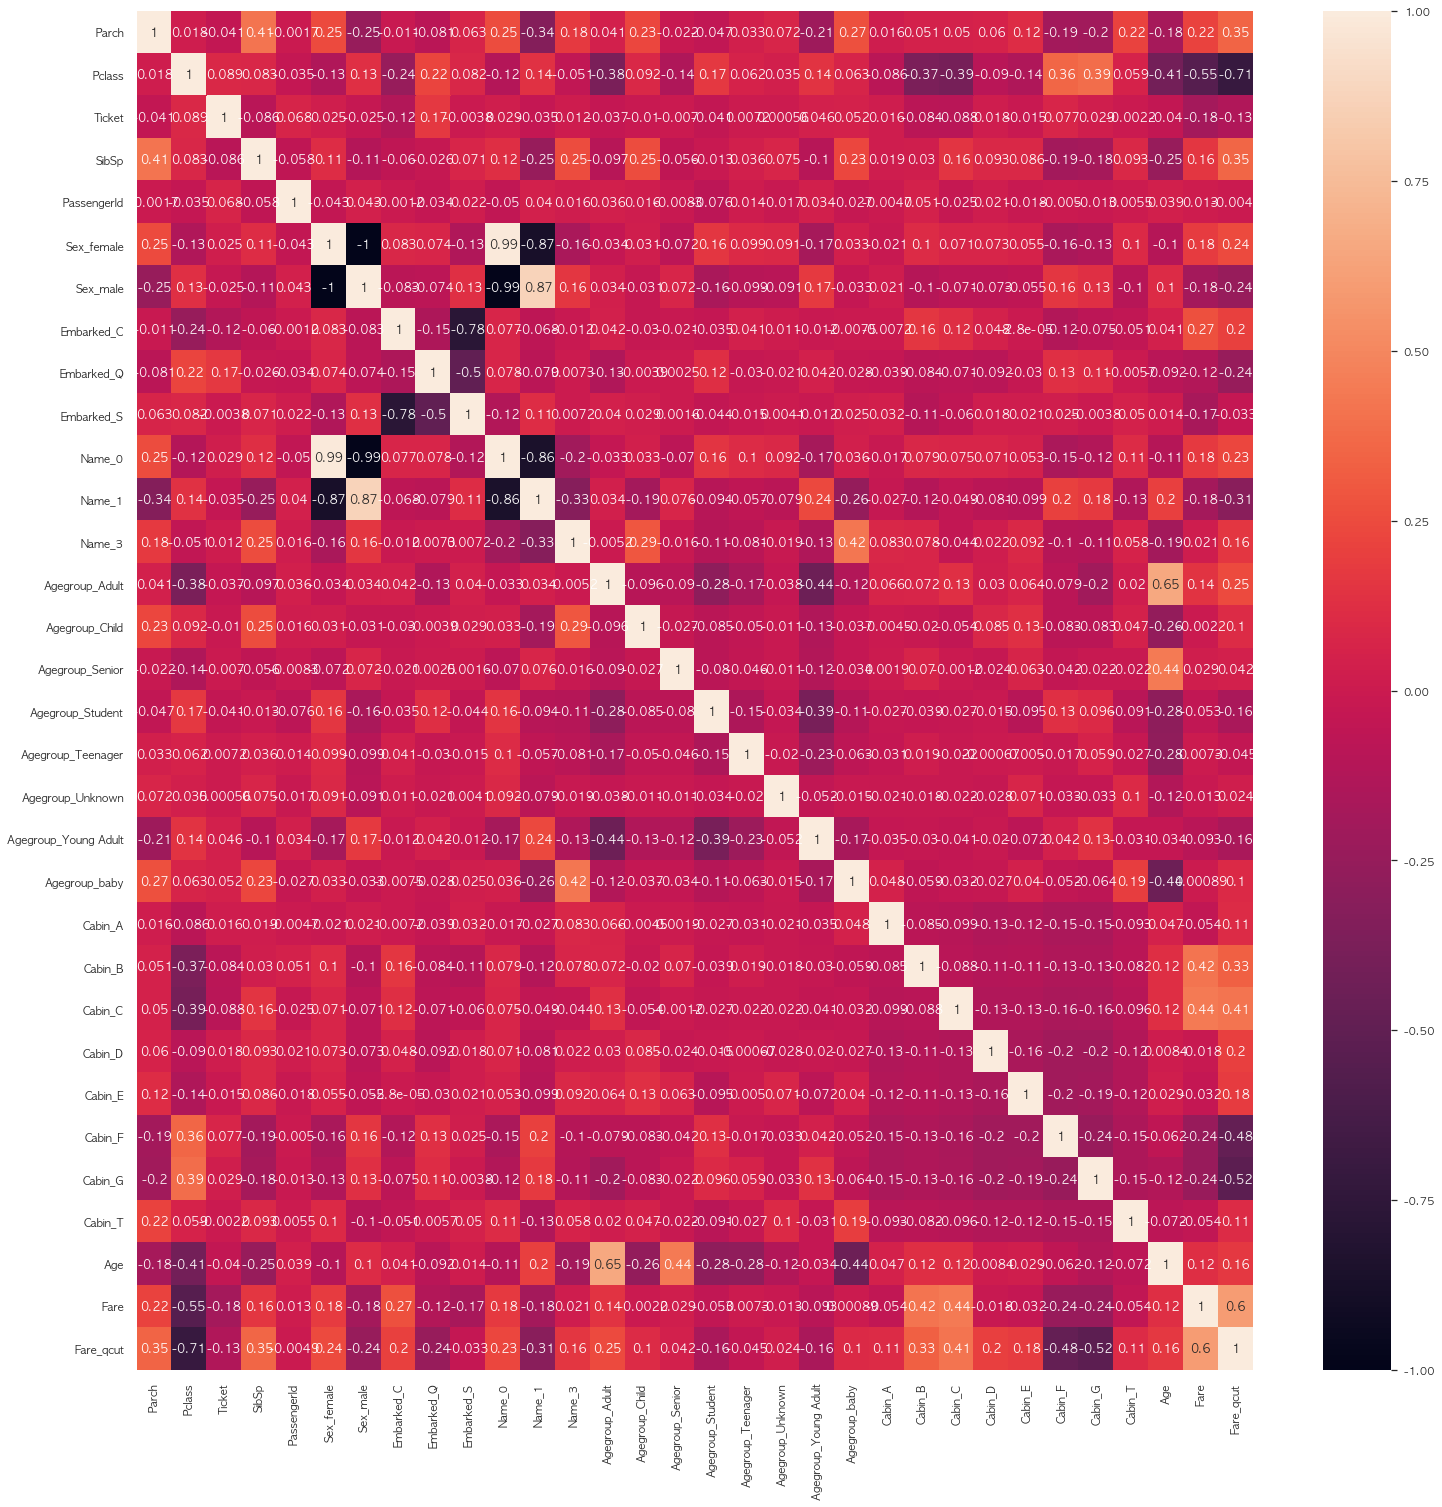

In [289]:
plt.figure(figsize = (25, 25))
sns.heatmap(X.corr(), annot = True)
plt.show()

# 4. Model

## 4-1. Baseline

In [290]:
from sklearn import model_selection
from sklearn import ensemble, gaussian_process, linear_model, naive_bayes, neighbors, svm, tree, discriminant_analysis
from xgboost import XGBClassifier

In [291]:
# 베이스 모델 
MLA = [
    # 앙상블 모델
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    # 가우시안 모델
    gaussian_process.GaussianProcessClassifier(),
    
    # 선형 모델
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    # 나이브베이지안 모델
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    # 이웃기반 모델
    neighbors.KNeighborsClassifier(),
    
    # SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    # 트리 모델
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    # 선형판별분석
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    # xgboost
    XGBClassifier()    
    ]

# cross validation
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = 0.2, train_size = 0.8, random_state = 42 ) # run model 10x with 60/30 split intentionally leaving out 10%

# 모델 비교를 위한 데이터프레임 생성
MLA_columns = ['MLA Name', 'MLA Parameters', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

In [292]:
# 모델별 predict 결과 저장
MLA_predict = y.copy()

# MLA_compare 데이터프레임에 각 모델 결과 저장
row_index = 0
for alg in MLA:

    # 모델별 base Parameter
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    cv_results = model_selection.cross_validate(alg, X=X, y=y, cv = cv_split)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
#     MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean() # cross_validate에서 'train_score' 나오지 않음
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3
    

    # 모델별 predict 값 저장
    alg.fit(X, y)
    MLA_predict[MLA_name] = alg.predict(X)
    
    row_index+=1

In [293]:
MLA_compare = MLA_compare.sort_values('MLA Test Accuracy Mean', ascending = False)
MLA_compare

,MLA Name,MLA Parameters,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.827933,0.0898799,0.141189
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.822905,0.0530256,0.116165
21,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.820112,0.0725913,0.121004
8,RidgeClassifierCV,"{'alphas': array([ 0.1, 1. , 10. ]), 'class_w...",0.817877,0.0989253,0.00590103
19,LinearDiscriminantAnalysis,"{'n_components': None, 'priors': None, 'shrink...",0.816201,0.100405,0.0049916
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.812291,0.0738952,0.0264976
6,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': None, '...",0.811732,0.077186,0.979773
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",0.800559,0.096,0.110079
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.797765,0.0598678,0.0719434
11,BernoulliNB,"{'alpha': 1.0, 'binarize': 0.0, 'class_prior':...",0.797207,0.0874244,0.00348072


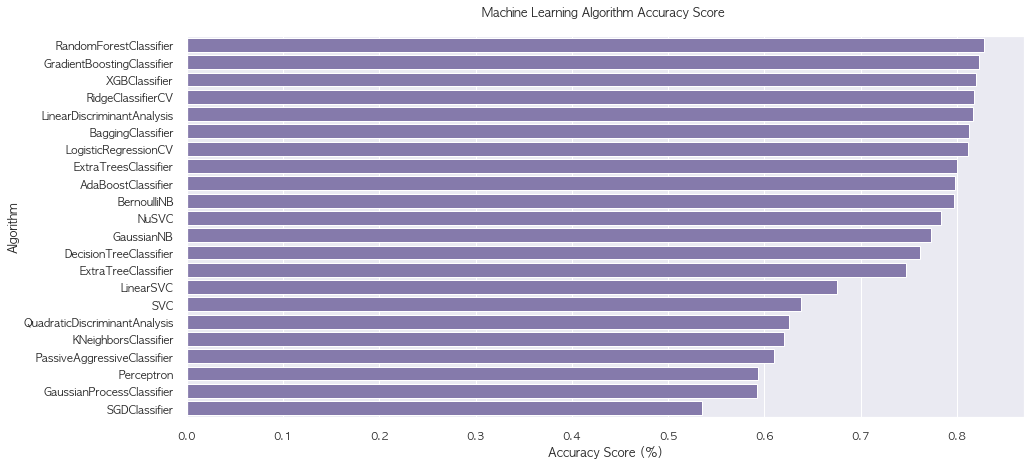

In [294]:
sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'm')

plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')
plt.show()

## 4-2. Ensemble

In [295]:
# 상위 10개 모델만 선정
TOP = []
for name in MLA_compare['MLA Name'].values:
    for alg in MLA:
        if name in str(alg):
            try:
                alg.predict_proba
                v = (name, alg)
                TOP.append(v)
            except:
                pass

In [296]:
TOPd

[('RandomForestClassifier', RandomForestClassifier()),
 ('GradientBoostingClassifier', GradientBoostingClassifier()),
 ('XGBClassifier', XGBClassifier()),
 ('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis()),
 ('BaggingClassifier', BaggingClassifier()),
 ('LogisticRegressionCV', LogisticRegressionCV()),
 ('ExtraTreesClassifier', ExtraTreesClassifier()),
 ('AdaBoostClassifier', AdaBoostClassifier()),
 ('BernoulliNB', BernoulliNB()),
 ('NuSVC', NuSVC(probability=True)),
 ('GaussianNB', GaussianNB()),
 ('DecisionTreeClassifier', DecisionTreeClassifier()),
 ('ExtraTreeClassifier', ExtraTreeClassifier()),
 ('SVC', SVC(probability=True)),
 ('SVC', NuSVC(probability=True)),
 ('QuadraticDiscriminantAnalysis', QuadraticDiscriminantAnalysis()),
 ('KNeighborsClassifier', KNeighborsClassifier()),
 ('GaussianProcessClassifier', GaussianProcessClassifier())]

In [297]:
vote_est = TOP[:9]

In [298]:
vote_est

[('RandomForestClassifier', RandomForestClassifier()),
 ('GradientBoostingClassifier', GradientBoostingClassifier()),
 ('XGBClassifier', XGBClassifier()),
 ('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis()),
 ('BaggingClassifier', BaggingClassifier()),
 ('LogisticRegressionCV', LogisticRegressionCV()),
 ('ExtraTreesClassifier', ExtraTreesClassifier()),
 ('AdaBoostClassifier', AdaBoostClassifier()),
 ('BernoulliNB', BernoulliNB())]

In [299]:
# Hard Vote
vote_hard = ensemble.VotingClassifier(estimators = vote_est , voting = 'hard')
vote_hard_cv = model_selection.cross_validate(vote_hard, X, y, cv  = cv_split)
vote_hard.fit(X, y)

print("Hard Voting Test w/bin score mean: {:.2f}". format(vote_hard_cv['test_score'].mean()*100))
print("Hard Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_hard_cv['test_score'].std()*100*3))
print('-'*10)


# Soft Vote
vote_soft = ensemble.VotingClassifier(estimators = vote_est , voting = 'soft')
vote_soft_cv = model_selection.cross_validate(vote_soft, X, y, cv  = cv_split)
vote_soft.fit(X, y)

print("Soft Voting Test w/bin score mean: {:.2f}". format(vote_soft_cv['test_score'].mean()*100))
print("Soft Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_soft_cv['test_score'].std()*100*3))
print('-'*10)

Hard Voting Test w/bin score mean: 83.58
Hard Voting Test w/bin score 3*std: +/- 9.28
----------
Soft Voting Test w/bin score mean: 82.85
Soft Voting Test w/bin score 3*std: +/- 7.72
----------


# 5. submission

In [100]:
# test 전처리

In [303]:
X_test = preprocessing.transform(test)

In [304]:
X_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agegroup,Fare_qcut
0,892,3,1,male,34.5,0,0,1,7.8292,G,Q,Young Adult,1.0
1,893,3,0,female,47.0,1,0,1,7.0000,F,S,Adult,0.0
2,894,2,1,male,62.0,0,0,1,9.6875,F,Q,Senior,1.0
3,895,3,1,male,27.0,0,0,1,8.6625,F,S,Young Adult,1.0
4,896,3,0,female,22.0,1,1,1,12.2875,D,S,Student,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,male,24.0,0,0,0,8.0500,G,S,Student,1.0
414,1306,1,3,female,39.0,0,0,0,108.9000,C,C,Adult,4.0
415,1307,3,1,male,38.5,0,0,0,7.2500,G,S,Adult,0.0
416,1308,3,1,male,24.0,0,0,1,8.0500,G,S,Student,1.0


In [305]:
continuous = ['Age', 'Fare', 'Fare_qcut']
categorical = list(set(X_test.columns) - set(continuous))
index = ['passengerId']

X_test = pd.concat([pd.get_dummies(X_test[categorical]), X_test[continuous]], axis = 1)
X_test

,Parch,Pclass,Ticket,SibSp,PassengerId,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Age,Fare,Fare_qcut
0,0,3,1,0,892,0,1,0,1,0,...,0,0,0,0,0,1,0,34.5,7.8292,1.0
1,0,3,1,1,893,1,0,0,0,1,...,0,0,0,0,1,0,0,47.0,7.0000,0.0
2,0,2,1,0,894,0,1,0,1,0,...,0,0,0,0,1,0,0,62.0,9.6875,1.0
3,0,3,1,0,895,0,1,0,0,1,...,0,0,0,0,1,0,0,27.0,8.6625,1.0
4,1,3,1,1,896,1,0,0,0,1,...,0,0,1,0,0,0,0,22.0,12.2875,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,3,0,0,1305,0,1,0,0,1,...,0,0,0,0,0,1,0,24.0,8.0500,1.0
414,0,1,0,0,1306,1,0,1,0,0,...,0,1,0,0,0,0,0,39.0,108.9000,4.0
415,0,3,0,0,1307,0,1,0,0,1,...,0,0,0,0,0,1,0,38.5,7.2500,0.0
416,0,3,1,0,1308,0,1,0,0,1,...,0,0,0,0,0,1,0,24.0,8.0500,1.0


In [311]:
X_test = X_test[X.columns]
X_test = X_test.fillna(0)

In [312]:
X_test

,Parch,Pclass,Ticket,SibSp,PassengerId,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Age,Fare,Fare_qcut
0,0,3,1,0,892,0,1,0,1,0,...,0,0,0,0,0,1,0,34.5,7.8292,1.0
1,0,3,1,1,893,1,0,0,0,1,...,0,0,0,0,1,0,0,47.0,7.0000,0.0
2,0,2,1,0,894,0,1,0,1,0,...,0,0,0,0,1,0,0,62.0,9.6875,1.0
3,0,3,1,0,895,0,1,0,0,1,...,0,0,0,0,1,0,0,27.0,8.6625,1.0
4,1,3,1,1,896,1,0,0,0,1,...,0,0,1,0,0,0,0,22.0,12.2875,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,3,0,0,1305,0,1,0,0,1,...,0,0,0,0,0,1,0,24.0,8.0500,1.0
414,0,1,0,0,1306,1,0,1,0,0,...,0,1,0,0,0,0,0,39.0,108.9000,4.0
415,0,3,0,0,1307,0,1,0,0,1,...,0,0,0,0,0,1,0,38.5,7.2500,0.0
416,0,3,1,0,1308,0,1,0,0,1,...,0,0,0,0,0,1,0,24.0,8.0500,1.0


In [306]:
X.shape, X_test.shape

((891, 32), (418, 32))

## 5-1. 결과 예측

In [308]:
sub = pd.read_csv(os.path.join('data', 'gender_submission.csv'))

In [309]:
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [313]:
pred_vote_hard = vote_hard.predict(X_test)
pred_vote_soft = vote_soft.predict(X_test)

In [334]:
dtest = xgboost.DMatrix(X_test)
pred_xgb = model.predict(dtest)
pred_xgb = np.array(pred_xgb, dtype = int)

In [335]:
for md, pred in zip(['hard', 'soft', 'xgb'], [pred_vote_hard, pred_vote_soft, pred_xgb]):
    sub['Survived'] = pred
    sub.to_csv(os.path.join('data', 'submission_{}.csv'.format(md)), index = False)